In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sympy import *

In [2]:
w1=[[2,6],[3,4],[3,8],[4,6]]
w2=[[3,0],[1,-2],[3,-4],[5,-2]]
Pw1=0.3
Pw2=0.7
x=Symbol('x')
y=Symbol('y')
X=[x,y]

In [3]:
x1=[pt[0] for pt in w1]
y1=[pt[1] for pt in w1]
u1=np.array([np.mean(x1),np.mean(y1)])
Σ1=np.cov(np.stack((x1,y1),axis=0))
print("Σ1=\n",Σ1)

Σ1=
 [[0.66666667 0.        ]
 [0.         2.66666667]]


In [4]:
x2=[pt[0] for pt in w2]
y2=[pt[1] for pt in w2]
u2=np.array([np.mean(x2),np.mean(y2)])
Σ2=np.cov(np.stack((x2,y2),axis=0))
print("Σ2=\n",Σ2)

Σ2=
 [[2.66666667 0.        ]
 [0.         2.66666667]]


In [5]:
def get_g(X,u,Σ,Pw):
    Σinv=np.linalg.inv(Σ)
    X_minus_uT=X-u
    X_minus_u=np.transpose(X_minus_uT)
    return (-1/2)*np.dot(X_minus_uT,np.dot(Σinv,X_minus_u))+(-1/2)*log(np.linalg.det(Σ))+log(Pw)

In [6]:
gx1=get_g(X,u1,Σ1,Pw1)
print("Discriminant Function 1: g1(x,y) =",gx1,'\n')
gx2=get_g(X,u2,Σ2,Pw2)
print("Discriminant Function 2: g2(x,y) =",gx2,'\n')

Discriminant Function 1: g1(x,y) = -0.5*(x - 3.0)*(1.5*x - 4.5) - 0.5*(0.375*y - 2.25)*(y - 6.0) - 1.49165487677772 

Discriminant Function 2: g2(x,y) = -0.5*(0.375*x - 1.125)*(x - 3.0) - 0.5*(0.375*y + 0.75)*(y + 2.0) - 1.33750419695046 



The Decision Boundary is : y = 0.1875*x**2 - 1.125*x + 3.73888355994242 



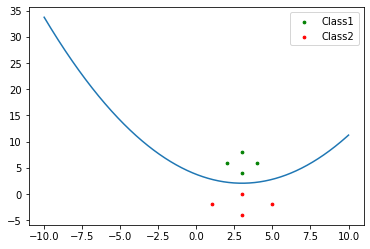

In [7]:
gx=solve(gx1-gx2,y,dict=True)
print("The Decision Boundary is : y =",gx[0][y],'\n')
xx=np.linspace(-10, 10, 1000)
yy=[lambdify(x,gx[0][y])(val) for val in xx]
plt.plot(xx,np.transpose(yy))
plt.scatter(x1,y1,label="Class1",color="green",marker=".",s=30)
plt.scatter(x2,y2,label="Class2",color="red",marker=".",s=30) 
plt.legend()
plt.show()